## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [9]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [10]:
rows = df.shape[0]
print('The data set contains ' +str(rows)+ ' rows')

The data set contains 294478 rows


c. The number of unique users in the dataset.

In [11]:
uniqID = df['user_id'].nunique()
print('The data set contains ' + str(uniqID) + ' unique users')

The data set contains 290584 unique users


d. The proportion of users converted.

In [12]:
convert = df['converted'].mean()
print('The proportion of users converted is {}'.format(round(convert, 4)))

The proportion of users converted is 0.1197


e. The number of times the `new_page` and `treatment` don't line up.

In [13]:
# rows where the treatment group lands on old_page
miss_grp1 = df.query("group =='treatment' and landing_page == 'old_page'")
print('The number of times a user from the treatment group lands on the old page is {}'.format(len(miss_grp1)))

The number of times a user from the treatment group lands on the old page is 1965


In [14]:
# rows where the control group lands on new_page
miss_grp2 = df.query("group =='control' and landing_page =='new_page'")
print('The number of times a user from the control group lands on the new page is {}'.format(len(miss_grp2)))

The number of times a user from the control group lands on the new page is 1928


In [15]:
# the sum of misalinged groups
miss_grp_sum = len(miss_grp1) + len(miss_grp2)
print('The total number of misalinged cases is {}'.format(miss_grp_sum))

The total number of misalinged cases is 3893


f. Do any of the rows have missing values?

In [16]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

According to the info table, the dataset is not missing any values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [17]:
# the new dataframe drops all misalinged treatment/control groups with landing_page
df.drop(df.query("group =='treatment' and landing_page =='old_page'").index, inplace = True)
df.drop(df.query("group =='control' and landing_page =='new_page'").index, inplace =True)

In [18]:
# check to see if rows were removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


The number of users has been reduced from 294478 to 290585, a difference of 3893 which is the sum of our misalinged users. 

In [19]:
# save to new csv file
df.to_csv('ab_data_mod.csv')

In [20]:
# loading the newly created csv file
df2 = pd.read_csv('ab_data_mod.csv')

In [21]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [22]:
uniqID2 = df2['user_id'].nunique()
print('The number of unique users is {}'.format(uniqID))

The number of unique users is 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [23]:
df2['user_id'].duplicated().sum()

1

In [24]:
df2[df2.duplicated(['user_id'], keep = False)]['user_id']

1876    773192
2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [25]:
df2[df2.duplicated(['user_id'], keep = False)]

,Unnamed: 0,user_id,timestamp,group,landing_page,converted
1876,1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [26]:
# deleting the duplicate record with the oldest data
dupID = '2017-01-09 05:37:58.781806'
df2 = df2[df2.timestamp != dupID]

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 6 columns):
Unnamed: 0      290584 non-null int64
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(3), object(3)
memory usage: 15.5+ MB


We can see that the number of users has reduced by 1, confirming we correctly dropped the duplicate user ID. 

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [28]:
conv_rate = df2['converted'].mean()
print('The probability of a conversion is {}'.format(round(conv_rate, 4)))

The probability of a conversion is 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [29]:
df2.groupby('group').mean()

,Unnamed: 0,user_id,converted
group,,,
control,147382.238900,788164.072594,0.120386
treatment,147160.259301,787845.719290,0.118808


The probability a user from the control group converts is 0.1203.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

The probability a user from the treatment group converts is 0.1188

d. What is the probability that an individual received the new page?

In [30]:
new_page_user = len(df.query("group =='treatment'"))
users = df.shape[0]
new_user_prob = new_page_user/users
print('The probabiity an individual landed on a new page is {}'.format(round(new_user_prob, 4)))

The probabiity an individual landed on a new page is 0.5001


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

When comparing the conversion probability rates of the control and treatment groups, they are virtually the same.  Thus, its difficult to say whether the new page leads to more conversions without considering other factors.  At this point, probability conversion is essentially a coin flip.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The hypothesis for our A/B test:

The null hypothesis (**$H_{0}$**) :  **$P_{new}$**<= **$P_{old}$**

The alternative hypothesis (**$H_{1}$**) :  **$P_{new}$** > **$P_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [31]:
pnew = df2['converted'].mean()
pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [32]:
pold = df2['converted'].mean()
pold

0.11959708724499628

In [33]:
# mean probability as p_mean
p_mean = (pnew + pold) /2
p_mean

0.11959708724499628

c. What is $n_{new}$?

In [34]:
nnew = len(df2.query('group =="treatment"'))
nnew

145310

d. What is $n_{old}$?

In [35]:
nold = len(df2.query('group =="control"'))
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [36]:
new_page_converted = np.random.choice([1, 0], size = nnew, p = [p_mean, (1-p_mean)])
print(len(new_page_converted))

145310


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [37]:
old_page_converted = np.random.choice([1, 0], size = nold, p = [p_mean, (1-p_mean)])
print(len(old_page_converted))

145274


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [38]:
# since the two are not the same size, we cannot calculate for a difference in p's, thus we remove some values from new_page_converted
new_page_converted = new_page_converted[:145274]

#check to see if it matches old_page_converted = 145274
#len(new_page_converted)

p_sim_new = new_page_converted/nnew
p_sim_old = old_page_converted/nold

p_diff = p_sim_new - p_sim_old
p_diff

array([0.00000000e+00, 6.88183883e-06, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [39]:
p_diffs = []

# running 10,000 simulations
for i in range(10000):
    new_page_converted = np.random.choice([1, 0], size = nnew, p = [pnew, (1-pnew)]).mean()
    old_page_converted = np.random.choice([1, 0], size = nold, p = [pold, (1-pold)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

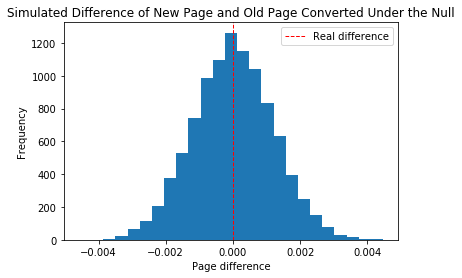

In [40]:
plt.hist(p_diffs, bins=25)
plt.title('Simulated Difference of New Page and Old Page Converted Under the Null')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=(pnew-pold), color='r', linestyle='dashed', linewidth=1, label="Real difference")
#plt.axvline(x=(np.array(p_diffs).mean()), color='g', linestyle='dashed', linewidth=1, label="Simulated difference")
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [41]:
# actual p_diff
#p_diff = pnew-pold
#p_diff

In [42]:
# first calculate the p_diff from the original ab_data.csv file
ab_diff = df[df['group'] == 'treatment']['converted'].mean() - df[df['group'] =='control']['converted'].mean()
ab_diff

-0.0015790565976871451

In [43]:
p_diffs = np.array(p_diffs)
p_diffs

array([-0.00096562,  0.0019251 , -0.00053905, ...,  0.00046597,
       -0.00011219, -0.00141333])

In [44]:
(ab_diff < p_diffs).mean()

0.9081

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We have computed the p-values, or probability of observing our statistic if the null hypothesis is true. What this value provides is a target value (typically when p-value = 0.05 or less) to rejecct the null and accept that the alternative hypothesis is not a random event. Alternatively, a higher p-value, typically more than 0.05 will lead to rejecting the alternative, and accepting the null. 
This dataset leans toward accepting the null hypothesis as the difference as the simulations suggest that the old page may actually outperform the new page to some degree.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [45]:
import statsmodels.api as sm

convert_old = df2.query('group =="control"')['converted'].sum()
convert_new = df2.query('group =="treatment"')['converted'].sum()
n_old = len(df2.query('group == "control"'))
n_new = len(df2.query('group =="treatment"'))

C:\Users\willt\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [46]:
z, p = sm.stats.proportions_ztest(count = [convert_new, convert_old], nobs=[n_new, n_old], alternative='smaller')
print('z-score:', z,
      '\np-value:', p)

z-score: -1.3109241984234394 
p-value: 0.09494168724097551


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Essentially, the z-score tells how many standard deviations a data point is from the mean value. Here we see we are approximately -1.31 standard deviations away. In addition, the p-value of about 0.09 (or 9%) exceeds a typical critcal p-value of 0.05, thus leaning to reject the alternative hypothesis and accept the null. Overall, the old landing page performs just as well, if not slightly better than the new landing page. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
df['intercept'] =1
df[['control', 'treatment']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [48]:
import statsmodels.api as sm
log = sm.Logit(df['converted'], df[['intercept', 'treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

results = log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Jun 2018   Pseudo R-squ.:               8.085e-06
Time:                        09:27:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The calculated p-value is 0.190, which is higher than what we calculated in the z-test above. This is likely due to p-value here evaluating as a 2-sided test, whereas in the above test, we evaluated as a 1-sided test (whether Pnew was greater than Pold). 

The null hypothesis (**$H_{0}$**): **$P_{new}$** = **$P_{old}$**

The alt hypothesis (**$H_{1}$**): **$P_{new}$** != **$P_{old}$**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Considering other factors may lead to a more robust model where we may find larger impacts or favorable impacts in the model.  There are many factors we can add to the model, however we must consider that too many factors may lead to an messier outputs.  When we account for too many inputs, we can cause an over-fitting, which can lead to lower coefficient of determination (R-squared) values. This value provides some confidence in your model the closer R2 is equal to 1. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [52]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [56]:
# merging countries.csv with AB_data.csv
df_new = countries_df.set_index('user_id').join(df.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1


In [57]:
df_new['country'].value_counts()

US    203620
UK     72466
CA     14499
Name: country, dtype: int64

In [58]:
### Create the necessary dummy variables
df_new[['CA', 'US', 'UK']] = pd.get_dummies(df_new['country'])[['CA', 'US', 'UK']]

df_new['country'].value_counts()

US    203620
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [60]:
df_new['US_ind_ab_page'] = df_new['US']*df_new['treatment']
df_new['CA_ind_ab_page'] = df_new['CA']*df_new['treatment']
logit_h = sm.Logit(df_new['converted'], df_new[['intercept', 'treatment', 'US', 'CA', 'US_ind_ab_page', 'CA_ind_ab_page']])

result = logit_h.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Jun 2018   Pseudo R-squ.:               3.483e-05
Time:                        09:38:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.9922      0.016   -123.457      0.000      -2.024      -1.961
treatment          0.0108      0.023      0.475      0.635      -0.034       0.056
US                 0.0057      0.019      0.306      0.760      -0.031       0.043
CA                -0.0118      0.040     -0.296      0.767      -0.090       0.066
US_ind_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
CA_ind_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==================================================================================
"""

In [66]:
df_new['US_ind_ab_page'] = df_new['US']*df_new['treatment']
df_new['CA_ind_ab_page'] = df_new['CA']*df_new['treatment']
df_new['UK_ind_ab_page'] = df_new['UK']*df_new['treatment']

logit_h = sm.Logit(df_new['converted'], df_new[['intercept', 'treatment', 'US', 'UK', 'US_ind_ab_page', 'UK_ind_ab_page']])

result = logit_h.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Jun 2018   Pseudo R-squ.:               3.483e-05
Time:                        10:01:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -2.0040      0.036    -55.008      0.000      -2.075      -1.933
treatment         -0.0674      0.052     -1.297      0.195      -0.169       0.034
US                 0.0175      0.038      0.465      0.642      -0.056       0.091
UK                 0.0118      0.040      0.296      0.767      -0.066       0.090
US_ind_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ind_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==================================================================================
"""

In [67]:
logit_h = sm.Logit(df_new['converted'], df_new[['intercept', 'treatment', 'CA', 'UK', 'CA_ind_ab_page', 'UK_ind_ab_page']])

result = logit_h.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Jun 2018   Pseudo R-squ.:               3.483e-05
Time:                        10:01:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.9865      0.010   -206.344      0.000      -2.005      -1.968
treatment         -0.0206      0.014     -1.506      0.132      -0.047       0.006
CA                -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK                -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_ind_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_ind_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==================================================================================
"""

#### Findings

Applying a regression model after joining the countries data, we foudn the p-values for each country to exceed our 0.05 acceptrance criteria. Thus, we accept the null. This matches our outcome when comparing probabilities without applying logistic regression. 

### Resources
Udacity course material for section 4 term 1 of the Data Analyst nanodegree.

Project walkthrough https://www.youtube.com/watch?v=7FTp9JJ5DfE&feature=youtu.be